<a href="https://colab.research.google.com/github/dpetrovic89/Forecast-Salaries-for-end-of-2020-and-2021-in-Serbia/blob/main/Forecast_Salaries_for_end_of_2020_and_2021_in_Serbia_GPU_%5BForecasting%5D_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries


In [1]:
import pandas as pd

import numpy as np

In [2]:
!pip install atspy

     |████████████████████████████████| 2.1MB 9.1MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 327kB 49.1MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 337kB 60.0MB/s 
     |████████████████████████████████| 13.1MB 225kB/s 
     |████████████████████████████████| 488.3MB 35kB/s 
     |████████████████████████████████| 3.7MB 55.5MB/s 
     |████████████████████████████████| 10.4MB 59.0MB/s 
     |████████████████████████████████| 40kB 7.3MB/s 
     |████████████████████████████████| 1.5MB 48.6MB/s 
     |████████████████████████████████| 7.1MB 9.6MB/s 
     |████████████████████████████████| 225kB 64.3MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 102kB 26kB/s 
     |████████████████████████████████| 753.4MB 25kB/s 
    

In [1]:
!pip install pigar

Restart Runtime

Runtime -> Restart Runtime -> Yes

In [4]:
pip install holidays==0.9.12

     |████████████████████████████████| 92kB 8.1MB/s 
  Created wheel for holidays: filename=holidays-0.9.12-cp36-none-any.whl size=47610 sha256=98dcb67b363d3cdae55f0dfb4ab16101a19ac6c87a753c1e58cd252ea7a6cffa
  Stored in directory: /root/.cache/pip/wheels/1f/fd/3a/f29866dc23dada18f25e9837477c82bbd7952aeef86fa46f11
Successfully built holidays
  Found existing installation: holidays 0.10.4
    Uninstalling holidays-0.10.4:
      Successfully uninstalled holidays-0.10.4


# Load Data

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dpetrovic89/Forecast-Salaries-for-end-of-2020-and-2021-in-Serbia/main/zarade-od-1994%20forecast%20dataset.csv")
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df.head()

,Neto,Bruto
Date,,
1994-01-31,25,45
1994-02-28,64,122
1994-03-31,82,151
1994-04-30,116,213
1994-05-31,136,233


In [3]:
df = df.drop(['Bruto'], axis = 1) 
df.head()

,Neto
Date,
1994-01-31,25
1994-02-28,64
1994-03-31,82
1994-04-30,116
1994-05-31,136


# Forecast

In [4]:
from atspy import AutomatedModel

INFO:root:Using GPU


In [5]:
# list of algorithms
model_list=["Gluonts","Prophet","NBEATS", "TBAT", "TATS", "TBATS1", "TBATP1", "TBATS2"]

am = AutomatedModel(df = df , model_list=model_list, season="infer_from_data",forecast_len=15 )

# we will call the forecaste_insample function which returns the forecast on the insample data and the performance.
forecast_in, performance = am.forecast_insample()

# now we will use outsample prediction which returns the out-of-sample forecasted dataframe.

forecast_out = am.forecast_outsample()

INFO:root:Start model training


<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
240
An insample split of training size 240 and testing size 81 has been constructed
Model Gluonts is being trained for in sample prediction


INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:07<00:00,  6.50it/s, avg_epoch_loss=9.45]
INFO:root:Epoch[0] Elapsed time 7.701 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=9.453691
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  7.10it/s, avg_epoch_loss=7.96]
INFO:root:Epoch[1] Elapsed time 7.049 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.961318
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.16it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[2] Elapsed time 6.985 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.625274
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  7.15it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[3] Elapsed time 6.992 seconds
INFO:root:Epoch[3] Evaluation metric 'epoc

Model Prophet is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=81, forecast_length=81, share_thetas=False) at @140529183076984
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=81, forecast_length=81, share_thetas=False) at @140529182638376
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=81, forecast_length=81, share_thetas=False) at @140529182639440
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=81, forecast_length=81, share_thetas=False) at @140529182638936
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=81, forecast_length=81, share_thetas=False) at @140529182638152
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=81, forecast_length=81, share_thetas=False) at @140529182640168

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model NBEATS is being used to forcast in sample
Model TBAT is being used to forcast in sample
Model TATS is being used to forcast in sample
Model TBATS1 is being used to forcast in sample
Model TBATP1 is being used to forcast in sample
Model TBATS2 is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:01<00:00, 27.33it/s, avg_epoch_loss=9.66]
INFO:root:Epoch[0] Elapsed time 1.833 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=9.658380
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.65it/s, avg_epoch_loss=8.47]
INFO:root:Epoch[1] Elapsed time 1.749 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.468469
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.98it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[2] Elapsed time 1.729 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=8.121142
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 29.12it/s, avg_epoch_loss=8.05]
INFO:root:Epoch[3] Elapsed time 1.721 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.054454
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 29.20it/s, avg_epoch_loss=7.94]
INFO

Model Prophet is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=15, forecast_length=15, share_thetas=False) at @140527652562424
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=15, forecast_length=15, share_thetas=False) at @140527652602264
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=15, forecast_length=15, share_thetas=False) at @140527652602544
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=15, forecast_length=15, share_thetas=False) at @140527652604056
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=15, forecast_length=15, share_thetas=False) at @140527652651248
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=15, forecast_length=15, share_thetas=False) at @1405276

In [6]:
forecast_in.head()

,Target,Gluonts,Prophet,NBEATS,TBAT,TATS,TBATS1,TBATP1,TBATS2
Date,,,,,,,,,
2014-01-31,37966,61630.175781,44131.012144,41548.906250,46989.172371,46989.172371,46989.172371,43927.770261,46989.172371
2014-02-28,44057,61704.761719,45414.146586,45689.460938,47416.826218,47416.826218,47416.826218,44424.037377,47416.826218
2014-03-31,43452,64633.621094,45616.185439,45133.710938,47837.950149,47837.950149,47837.950149,45998.047474,47837.950149
2014-04-30,45847,57645.246094,46704.936465,45919.472656,48252.576073,48252.576073,48252.576073,46261.092871,48252.576073
2014-05-31,44184,57692.683594,46017.777903,45617.593750,48660.739248,48660.739248,48660.739248,46236.137955,48660.739248


In [43]:
# forecast - prognoza
forecast_out.head(15)

,Gluonts,Prophet,NBEATS,TBAT,TATS,TBATS1,TBATP1,TBATS2
2020-10-31,55694.56,56816.80,56122.45,60100.60,59947.64,60518.26,59316.51,59450.06
2020-11-30,58522.02,57137.26,57175.75,60284.87,59910.43,60663.43,61260.84,58776.95
2020-12-31,59927.96,60627.36,56072.70,60459.84,59851.13,60794.34,64881.48,58749.72
2021-01-31,58628.23,55456.79,55241.83,60625.97,59771.14,60908.37,58901.33,57963.58
2021-02-28,57641.00,57701.97,57501.00,60783.68,59672.04,61003.08,59473.55,57843.17
2021-03-31,57965.11,57984.08,56206.09,60933.36,59555.58,61076.19,61459.08,56994.48
2021-04-30,57677.82,59152.76,57016.62,61075.42,59423.66,61125.60,61609.44,56831.20
2021-05-31,57218.71,58085.32,58253.53,61210.22,59278.32,61149.43,61435.60,55971.22
2021-06-30,53861.86,58887.68,58323.27,61338.12,59121.69,61146.00,60956.64,55815.65
2021-07-31,59084.75,59040.80,58864.73,61459.45,58956.00,61113.90,62826.40,54994.26


In [8]:
pd.options.display.float_format = "{:.2f}".format

performance

,Target,Gluonts,Prophet,NBEATS,TBAT,TATS,TBATS1,TBATP1,TBATS2
rmse,0.00,23660.12,6487.21,4297.00,9778.17,9778.17,9778.17,4419.52,9778.17
mse,0.00,559801089.82,42083883.74,18464178.45,95612631.39,95612631.39,95612631.39,19532117.01,95612631.39
mean,49177.81,71152.52,55171.65,48666.10,58376.80,58376.80,58376.80,52066.09,58376.80


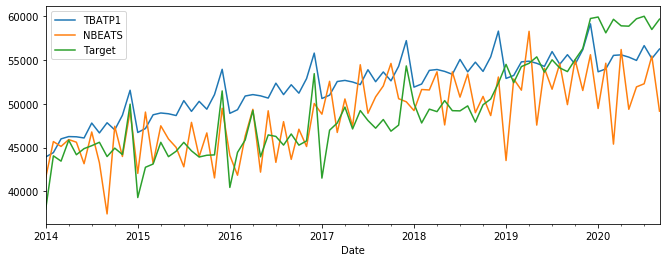

In [41]:
forecast_in[["TBATP1","NBEATS","Target"]].plot()

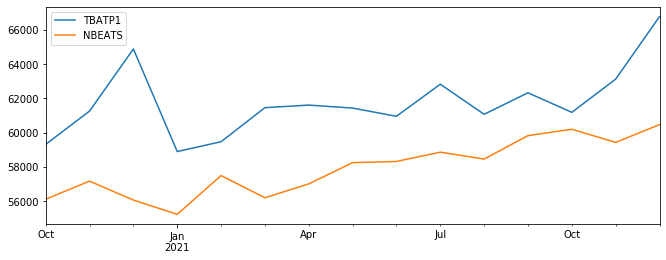

In [13]:
# compare two best models
forecast_out[["TBATP1","NBEATS"]].plot()

In [42]:
import plotly.express as px
import plotly.graph_objects as go

y = forecast_out['TBATP1'].astype(int)


fig = px.line(forecast_out, x=forecast_out.index, y=y, title='Neto Plate Prognoza od oktobra 2020 do decembra 2021',text=y)

fig.show()



In [40]:
forecast_in.tail()

,Target,Gluonts,Prophet,NBEATS,TBAT,TATS,TBATS1,TBATP1,TBATS2
Date,,,,,,,,,
2020-05-31,58892,89427.65,63560.57,49382.29,64958.20,64958.20,64958.20,55351.69,64958.20
2020-06-30,59740,89218.53,64226.76,51944.49,65059.18,65059.18,65059.18,54975.08,65059.18
2020-07-31,60029,90393.14,64464.11,52302.95,65158.07,65158.07,65158.07,56671.28,65158.07
2020-08-31,58513,89986.12,64695.44,55470.11,65254.89,65254.89,65254.89,55188.71,65254.89
2020-09-30,59698,89680.90,64396.81,49166.12,65349.69,65349.69,65349.69,56278.24,65349.69
